<a href="https://colab.research.google.com/github/zolzayakh/Dive-into-coding/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Problem 1] Execution of various method**s

In [2]:
#import libraries
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN,LSTM
from keras.layers.recurrent import GRU
from keras.datasets import imdb
from keras import backend as K

In [3]:
# Data preparation 
max_features = 20000
maxlen = 80
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
print (x_train.shape)
print (x_test.shape)
print (x_train[1,:])

(25000, 80)
(25000, 80)
[ 125   68    2 6853   15  349  165 4362   98    5    4  228    9   43
    2 1157   15  299  120    5  120  174   11  220  175  136   50    9
 4373  228 8255    5    2  656  245 2350    5    4 9837  131  152  491
   18    2   32 7464 1212   14    9    6  371   78   22  625   64 1382
    9    8  168  145   23    4 1690   15   16    4 1355    5   28    6
   52  154  462   33   89   78  285   16  145   95]


In [5]:
#Define model

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Training 
batch_size = 32
epochs = 1
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

782/782 [==============================] - 85s 105ms/step - loss: 0.6904 - accuracy: 0.5378 - val_loss: 0.6431 - val_accuracy: 0.6110


In [7]:
# Performance
score, acc = model.evaluate(x_test, y_test,batch_size=batch_size) 

782/782 [==============================] - 12s 15ms/step - loss: 0.6431 - accuracy: 0.6110


In [8]:
#Write to table
import pandas as pd

#calculate evaluation metrics and add to evaluation_table
def calculate_metrics_add_to_table(score, accuracy, model_name, table_name):
  d = {'accuracy':[accuracy], 'loss':[score]}
  evaluation_result = pd.DataFrame(data=d, index=[model_name])
  return table_name.append(evaluation_result)

evaluation_table = pd.DataFrame(columns = ('accuracy', 'loss'))
evaluation_table = calculate_metrics_add_to_table(score, acc, 'SimpleRNN', evaluation_table)
print (evaluation_table)

           accuracy     loss
SimpleRNN   0.61104  0.64313


In [9]:
# Define model
model2 = Sequential()
model2.add(Embedding(max_features, 128))
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Training 
batch_size = 32
epochs = 1
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

782/782 [==============================] - 242s 305ms/step - loss: 0.4247 - accuracy: 0.8044 - val_loss: 0.3635 - val_accuracy: 0.8378


In [11]:
# Performance
score2, acc2 = model2.evaluate(x_test, y_test,batch_size=batch_size)

782/782 [==============================] - 25s 32ms/step - loss: 0.3635 - accuracy: 0.8378


In [12]:
evaluation_table = calculate_metrics_add_to_table(score2, acc2, 'LSTM', evaluation_table)
print (evaluation_table)

           accuracy      loss
SimpleRNN   0.61104  0.643130
LSTM        0.83784  0.363494


In [13]:
#Define model GRU
model3 = Sequential()
model3.add(Embedding(max_features, 128))
model3.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         2560000   
                                                                 
 gru (GRU)                   (None, 128)               98688     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Training 
batch_size = 32
epochs = 1
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

782/782 [==============================] - 238s 300ms/step - loss: 0.4433 - accuracy: 0.7828 - val_loss: 0.3580 - val_accuracy: 0.8445


In [15]:
# Performance
score3, acc3 = model3.evaluate(x_test, y_test,batch_size=batch_size)

782/782 [==============================] - 20s 26ms/step - loss: 0.3580 - accuracy: 0.8445


In [16]:
evaluation_table = calculate_metrics_add_to_table(score3, acc3, 'GRU', evaluation_table)
print (evaluation_table)

           accuracy      loss
SimpleRNN   0.61104  0.643130
LSTM        0.83784  0.363494
GRU         0.84452  0.357967


ConvLSTM2D

In [17]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

In [18]:
#Creating video data
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),dtype=np.float)
    for i in range(n_samples):
        n = np.random.randint(3, 8)
        for j in range(n):
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1
            w = np.random.randint(2, 4)
            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,x_shift - w - 1: x_shift + w + 1,y_shift - w - 1: y_shift + w + 1,0] += noise_f * 0.1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

noisy_movies, shifted_movies = generate_movies(n_samples=1200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


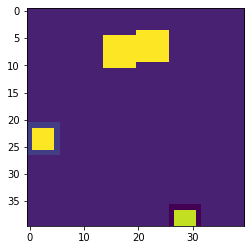

In [19]:
#Chech video 
index = 1
x = noisy_movies[index]
fig = plt.figure()
viewer = fig.add_subplot(111)
plt.ion()
fig.show()
for i in range(len(x)):
    viewer.clear()
    #print (x[i].shape)
    #print (x[i][:, :, 0].shape)
    #viewer.imshow(x[i])
    viewer.imshow(x[i][:, :, 0])
    plt.pause(.1)
    fig.canvas.draw()